In [29]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline


In [2]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'data_set_citations.json'

In [3]:
df = pd.read_json(dirname+filename)
df['data_set_id'] = ['data_'+str(i) for i in df['data_set_id']]
df['publication_id'] = ['pub_'+str(i) for i in df['publication_id']]
df = df.drop('mention_list', axis=1)
df.head()

,data_set_id,publication_id,score
0,data_305,pub_103,0.264053
1,data_306,pub_103,0.429020
2,data_320,pub_103,0.374938
3,data_306,pub_104,0.293487
4,data_306,pub_106,0.343932


In [4]:
df.shape

(2925, 3)

In [5]:
df_visual = df.sample(frac=0.05, replace=True, random_state=1)

In [6]:
G = nx.Graph()
G.add_weighted_edges_from(df.values.tolist(),color='black')

In [7]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'research_fields.json'

In [8]:
df_rf = pd.read_json(dirname+filename)
# df_rf['data_set_id'] = ['data_'+str(i) for i in df_rf['data_set_id']]
df_rf['publication_id'] = ['pub_'+str(i) for i in df_rf['publication_id']]
# df_rf = df_rf.drop('mention_list', axis=1)
df_rf.head(5)

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91


In [9]:
df_rf_visual = pd.merge(df_rf,df_visual , on='publication_id', how='inner')[['publication_id','research_field','score_x']]

In [10]:
set(df_rf_visual.research_field)

{'business:criminology',
 'business:education',
 'business:finance',
 'business:healthcare',
 'economics:finance',
 'economics:healthcare',
 'medicine:education',
 'medicine:finance',
 'medicine:healthcare',
 'sociology:criminology',
 'sociology:education',
 'sociology:finance',
 'sociology:healthcare'}

In [11]:
G.add_weighted_edges_from(df_rf.values.tolist(),color='blue')

In [12]:
df_ = df[df.data_set_id != 'data_438']

In [13]:
dataset_degrees_dict = {}
for dataset in df_.data_set_id:
    degree = G.degree(dataset)
    dataset_degrees_dict[dataset] = degree

dataset_degrees = [x for x in dataset_degrees_dict.values()]

In [105]:
pub_degrees_dict = {}
for pub in df_.publication_id:
    degree = G.degree(pub)
    pub_degrees_dict[pub] = degree

pub_degrees = [x for x in pub_degrees_dict.values()]

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
def plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'density', figsize = (10,8), bins = 50):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))
    if ptype == 'density':
        sns.distplot(dataset_degrees, hist = True)
        plt.ylabel('Density')
        plt.xlabel('Degree')

    if ptype == 'count':
        plt.hist(dataset_degrees, bins = bins)
        plt.ylabel('Count')
        plt.xlabel('Degree')

    if ptype == 'box':
        sns.boxplot(dataset_degrees, orient = 'v')
        plt.ylabel('Degree')

    plt.title('{} Nodes Degree Distribution'.format(node_type))
    plt.show()

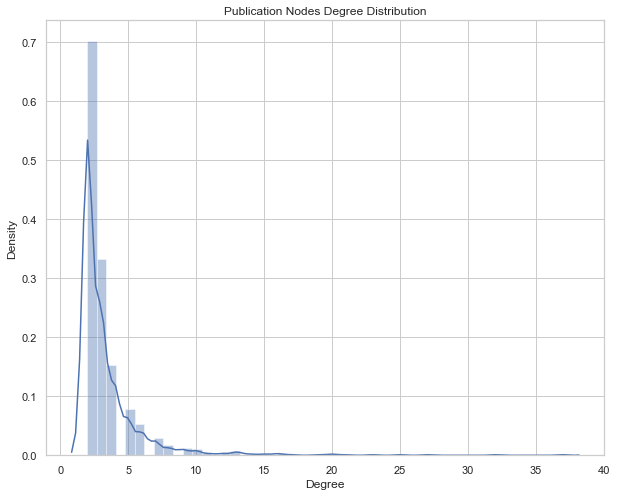

In [108]:
plotDegreeDistribution(pub_degrees, node_type = 'Publication', ptype = 'density', figsize = (10,8), bins = 50)

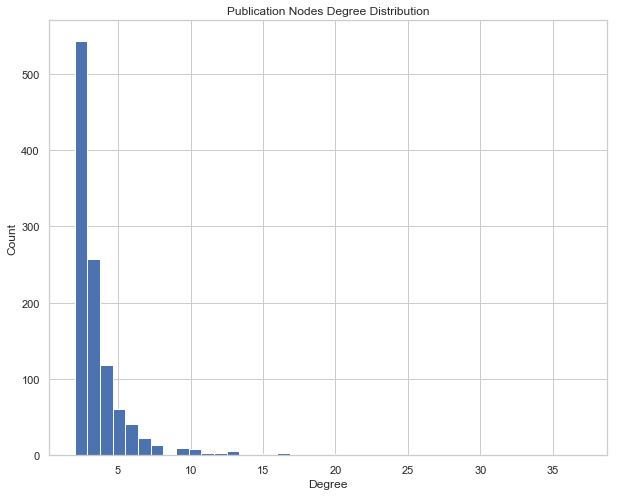

In [109]:
plotDegreeDistribution(pub_degrees, node_type = 'Publication', ptype = 'count', figsize = (10,8), bins = 40)

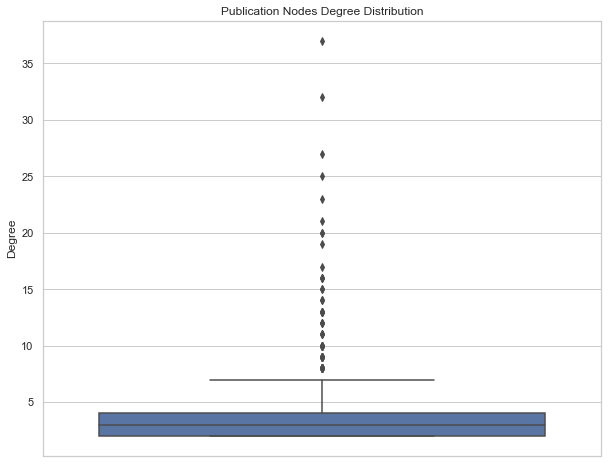

In [110]:
plotDegreeDistribution(pub_degrees, node_type = 'Publication', ptype = 'box', figsize = (10,8), bins = 50)

In [24]:
#Get research field to publications from df_rf
#then map datasets to research fields 
rf = sorted(df_rf_visual.research_field.unique())
rf_data_dict = {}
for field in rf:
    pubs = df_rf_visual[df_rf_visual.research_field == field].publication_id
    data_set = set()
    for pub in pubs:
        data = df_visual[df_visual.publication_id == pub].data_set_id
        for x in data:
            data_set.add(x)
    rf_data_dict[field] = data_set

In [25]:
rf_data_dict_count = {}
for key in rf_data_dict.keys():
    rf_data_dict_count[key] = len(rf_data_dict[key])

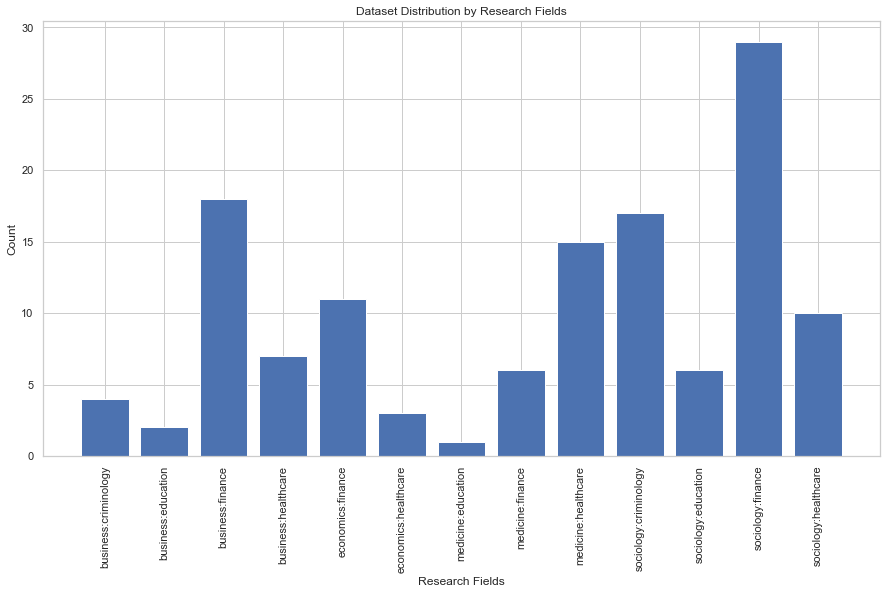

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))
plt.bar(range(len(rf_data_dict_count)), list(rf_data_dict_count.values()), align='center')
plt.xticks(range(len(rf_data_dict_count)), list(rf_data_dict_count.keys()), rotation = 90)
plt.xlabel('Research Fields')
plt.ylabel('Count')
plt.title('Dataset Distribution by Research Fields')
plt.show()

In [101]:
randomseed = 4
pos = nx.spring_layout(G)

In [102]:
df_rf_visual.head()

,publication_id,research_field,score_x
0,pub_121,business:finance,0.89
1,pub_130,economics:finance,0.81
2,pub_138,business:finance,0.91
3,pub_2889,economics:finance,0.88
4,pub_3161,business:finance,0.87


In [106]:
def multiassign_x_y(d, keys, values):
    for k, v in zip(keys, values):
        d[k][0] = v 
        d[k][1] = d[k][1]*10

In [108]:
dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
rf_nodes_list = list(rf_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,rf_nodes_list,[0.8]*len(rf_nodes_list))



In [126]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
'pub_9140' in pub_nodes_list

False

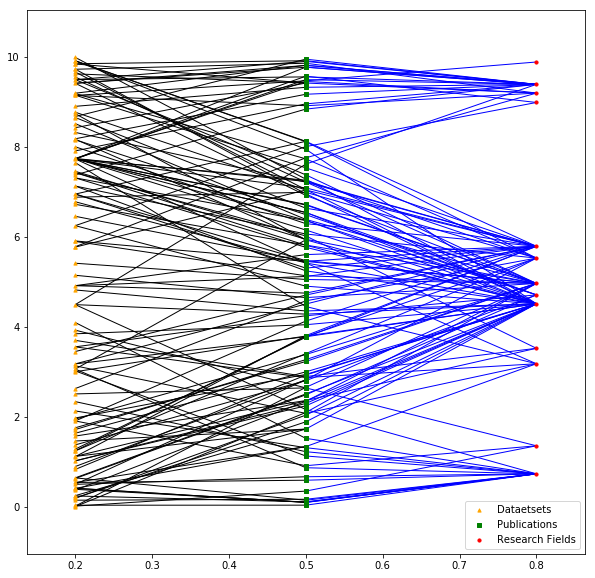

In [127]:
from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

In [31]:
dataset_id_sorted = sorted(df.data_set_id.unique(), key = lambda x: int(x.split('_')[1]))
dataset_dis_matrix = np.array([[None]*len(dataset_id_sorted) for x in range(len(dataset_id_sorted))])
dataset_dis_matrix

array([[None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       ...,
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None]], dtype=object)

In [34]:
import time

from networkx.algorithms.connectivity import local_node_connectivity

start_time = time.clock()

num_dataset = len(dataset_id_sorted)

for row in range(num_dataset):
    for col in range(num_dataset):
        try:
            dataset_dis_matrix[row][col] = len(nx.shortest_path(G, dataset_id_sorted[row], dataset_id_sorted[col]))-1
        except:
            dataset_dis_matrix[row][col] = 4
    if row%50 == 0:
        print("Now at row {}, time passed: {}".format(row, time.clock()-start_time))
            
print("Finished")
print("Total Run Time: ", time.clock()-start_time)

Now at row 0, time passed: 0.07450100000000015
Now at row 50, time passed: 3.0086839999999997
Now at row 100, time passed: 6.59997
Now at row 150, time passed: 9.467483999999999
Now at row 200, time passed: 12.027512999999999
Now at row 250, time passed: 16.977299000000002
Now at row 300, time passed: 20.439308
Now at row 350, time passed: 23.764031
Now at row 400, time passed: 26.716978
Now at row 450, time passed: 30.196851
Now at row 500, time passed: 33.319767
Finished
Total Run Time:  35.290203


In [35]:
df_matrix = pd.DataFrame(dataset_dis_matrix, columns = dataset_id_sorted, index = dataset_id_sorted)
df_matrix.head(10)


,data_39,data_40,data_42,data_44,data_45,data_46,data_47,data_48,data_49,data_50,...,data_2449,data_2601,data_3579,data_4362,data_4745,data_6742,data_7012,data_8018,data_8304,data_9424
data_39,0,4,4,4,4,4,4,2,4,4,...,4,4,4,8,4,8,6,4,4,4
data_40,4,0,4,4,4,2,2,2,2,2,...,6,6,4,6,4,6,6,4,4,6
data_42,4,4,0,4,4,4,6,4,6,4,...,8,8,8,8,8,8,6,8,8,6
data_44,4,4,4,0,2,4,4,4,4,4,...,8,8,6,8,6,8,6,6,8,6
data_45,4,4,4,2,0,4,4,4,4,2,...,6,6,4,6,6,6,6,6,6,6
data_46,4,2,4,4,4,0,2,2,2,2,...,6,6,6,8,4,8,6,6,6,6
data_47,4,2,6,4,4,2,0,2,2,2,...,6,6,6,6,4,6,6,6,6,6
data_48,2,2,4,4,4,2,2,0,2,2,...,6,6,6,8,4,8,6,4,6,6
data_49,4,2,6,4,4,2,2,2,0,2,...,6,6,6,6,4,6,6,6,6,6
data_50,4,2,4,4,2,2,2,2,2,0,...,6,6,6,8,4,8,6,4,4,6


In [61]:
ticks = [[(10/12)*i for i in range(13)][2*i+1] for i in range(6)] 

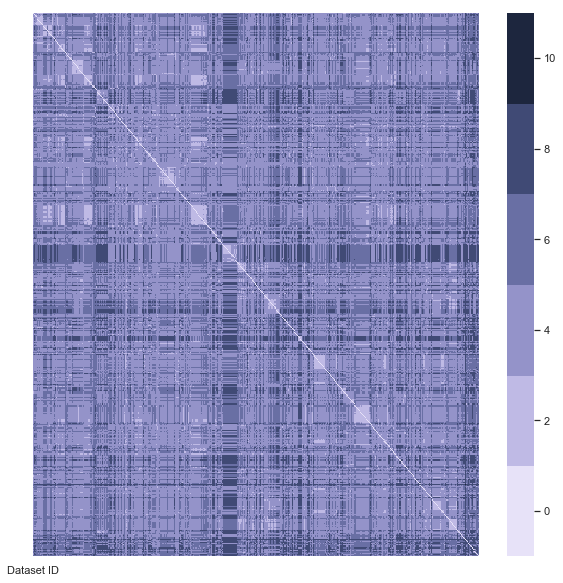

In [68]:
plt.figure(figsize = (10,10))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, light=0.9, n_colors=6)
ax = sns.heatmap(df_matrix[df_matrix.columns].astype(float), cmap = cmap, xticklabels = ['Dataset ID'], yticklabels = False)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(ticks)
colorbar.set_ticklabels(['0', '2', '4', '6', '8', '10'])

In [83]:
df_matrix.head()

,data_39,data_40,data_42,data_44,data_45,data_46,data_47,data_48,data_49,data_50,...,data_2449,data_2601,data_3579,data_4362,data_4745,data_6742,data_7012,data_8018,data_8304,data_9424
data_39,0,4,4,4,4,4,4,2,4,4,...,4,4,4,8,4,8,6,4,4,4
data_40,4,0,4,4,4,2,2,2,2,2,...,6,6,4,6,4,6,6,4,4,6
data_42,4,4,0,4,4,4,6,4,6,4,...,8,8,8,8,8,8,6,8,8,6
data_44,4,4,4,0,2,4,4,4,4,4,...,8,8,6,8,6,8,6,6,8,6
data_45,4,4,4,2,0,4,4,4,4,2,...,6,6,4,6,6,6,6,6,6,6


In [103]:
dist = [dataset_dis_matrix[i][i+1:] for i in range(len(dataset_dis_matrix))]
dist_flattened = []
for array in dist:
    for item in array:
        dist_flattened.append(item)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


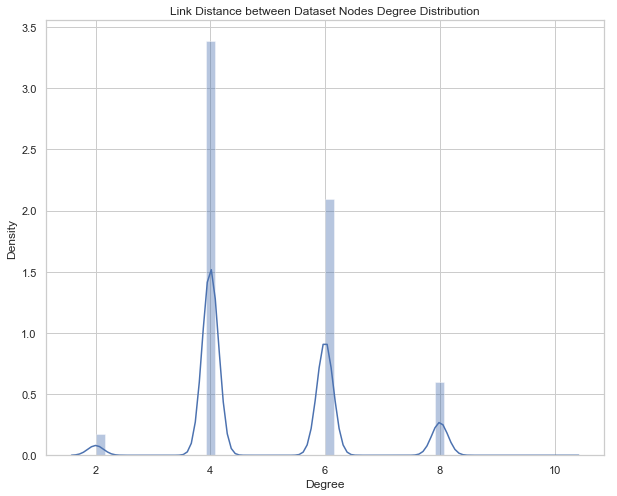

In [104]:
plotDegreeDistribution(dist_flattened, node_type='Link Distance between Dataset')

In [290]:
df_rf.head()

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91


In [300]:
dataset_degrees_dict, 

{'data_305': 16,
 'data_306': 30,
 'data_320': 14,
 'data_1283': 11,
 'data_1286': 17,
 'data_330': 2,
 'data_339': 34,
 'data_312': 4,
 'data_364': 4,
 'data_337': 2,
 'data_1282': 1,
 'data_331': 2,
 'data_324': 1,
 'data_375': 2,
 'data_370': 1,
 'data_374': 1,
 'data_379': 2,
 'data_380': 2,
 'data_400': 4,
 'data_39': 18,
 'data_1135': 16,
 'data_204': 15,
 'data_92': 22,
 'data_401': 10,
 'data_480': 23,
 'data_42': 1,
 'data_831': 1,
 'data_826': 27,
 'data_961': 2,
 'data_1332': 1,
 'data_398': 27,
 'data_928': 34,
 'data_1206': 29,
 'data_1253': 26,
 'data_72': 1,
 'data_1232': 3,
 'data_396': 2,
 'data_455': 12,
 'data_714': 4,
 'data_406': 3,
 'data_832': 17,
 'data_94': 3,
 'data_545': 39,
 'data_1007': 2,
 'data_377': 26,
 'data_137': 2,
 'data_491': 4,
 'data_509': 3,
 'data_510': 3,
 'data_518': 7,
 'data_78': 1,
 'data_82': 1,
 'data_450': 4,
 'data_1295': 6,
 'data_68': 2,
 'data_143': 1,
 'data_148': 1,
 'data_150': 2,
 'data_757': 3,
 'data_887': 1,
 'data_888': 1,
 

In [ ]:
G